## Chapter 01. Term Document Matrix (TDM)

In [32]:
import pandas as pd
import warnings; warnings.filterwarnings('ignore')

df = pd.read_excel('./data/imdb.xlsx', index_col=0) #index_col=0은 파일에서 0번 컬럼이 행번호를 나타냄을 뜻함
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [33]:
df.shape

(748, 2)

### TDM (Term Document Matrix)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer # 단어문서행렬을 만드는 모듈
# 토큰이 문서별로 몇 번 등장했는지 행렬로 정리, 특별히 토큰화하는 방법을 지정해주지 않으면 빈 칸을 기준으로 토큰 구분
# max_features : 단어문서행렬에 포함시킬 최대의 단어수를 정의, 위는 빈도수 순으로 최대 500단어까지 포함
# TDM이 희소행렬이므로, 용량이 크기 때문에 너무 많은 단어를 포함시킬 경우, 용량이 부족해질 수 있으므로 용량과 분석의 정확성을 고려
# stop_words: 분석에서 제외할 불용어를 설정, 위는 영어로서 관사, 전치사 등을 제외하며(어순이 무시될 시, 의미를 파악하기 힘드므로) 다른 언어는 리스트 등의 형태로 불용어 목록 제공
cv = CountVectorizer(max_features=500, stop_words='english')
cv

CountVectorizer(max_features=500, stop_words='english')

In [35]:
# eview 칼럼을 바탕으로 단어문서행렬 생성
tdm = cv.fit_transform(df['review'])
tdm #tdm 자체는 압축되어 있기 때문에 바로 확인할 수 없음

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [36]:
tdm.shape #74행 500열 #374000 크기의 표지만, 3433개의 숫자만 존재

(748, 500)

In [37]:
# 단어 목록
cv.get_feature_names()[:10] #단어 목록을 확인, tdm이 아닌 cv에 저장

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [38]:
# 단어별 총 빈도
tdm.sum(axis=0) #단어별 총빈도, axis=0 열별 합계, axis=1 행별 합계

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [39]:
tdm.sum(axis=1) #문서별(각 문장별) 단어 수를 계산, 각 행이 문서이므로 행별 합계를 낼 경우, 문서별 총 단어수를 구할 수 있다

matrix([[  5],
        [  5],
        [ 12],
        [  3],
        [  6],
        [  7],
        [  2],
        [  7],
        [  2],
        [  2],
        [  1],
        [  4],
        [  3],
        [  1],
        [  5],
        [  5],
        [  6],
        [ 10],
        [  3],
        [229],
        [  5],
        [  2],
        [  5],
        [  3],
        [  1],
        [  2],
        [  4],
        [  2],
        [  7],
        [  3],
        [  1],
        [  0],
        [  1],
        [  3],
        [  4],
        [  6],
        [  3],
        [  6],
        [ 11],
        [  3],
        [  4],
        [  3],
        [  2],
        [  0],
        [  0],
        [  6],
        [  4],
        [  3],
        [  1],
        [  8],
        [  5],
        [  5],
        [  2],
        [  2],
        [  4],
        [  5],
        [  5],
        [  1],
        [  2],
        [  4],
        [  3],
        [  4],
        [  0],
        [  1],
        [  2],
        [  3],
        [ 

In [40]:
# 각 단어의 총 빈도를 데이터 프레임으로 만듦, .sum의 결과가 행렬 형태이므로 ._flat을 사용하여 칼럼에 들어갈 수 있는 형태로 변환
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [41]:
word_count.sort_values('빈도', ascending=False).head() # 빈도순으로 오름차순 정렬

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


In [42]:
# 단어 빈도 저장
word_count.to_csv('./data/word_count.csv')

#### Word Cloud

In [43]:
# !pip install wordcloud

In [44]:
# 단어의 빈도를 시각화하는 방법
word_count = pd.read_csv('./data/word_count.csv', index_col=0)

In [45]:
from wordcloud import WordCloud
# font_path: 글꼴의 경로
# max_words: 워드 클라우드를 그릴 단어의 개수
# background_color: 배경색 설정
# width: 가로크기(픽셀 단위)
# height: 세로크기(픽셀 단위)
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)
# 배경 흰색, 최대 100단어, 가로 400픽셀, 세로 300픽셀

In [46]:
word_count.set_index('단어') #단어가 행 이름이 됨, 테이블 형식

,빈도
단어,
10,29
20,3
90,6
absolutely,9
acted,3
...,...
wrong,3
year,5
years,14


In [47]:
word_count.set_index('단어')['빈도'] #'빈도' 컬럼 하나만 호출

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [48]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
#word_count를 사전 형태로 변환 = dict(zip(word_count['단어'], word_count['빈도']))
count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

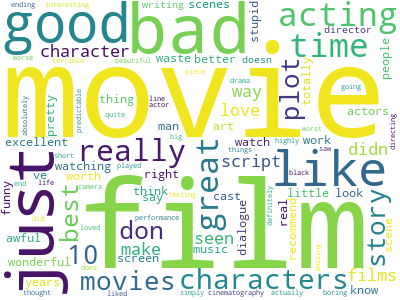

In [49]:
cloud = wc.fit_words(count_dic) #단어 구름을 fit 시킴
cloud.to_image()

In [50]:
cloud.to_file('./data/cloud.png') #단어 구름을 파일로 저장

### TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# CountVectorizer와 사용법 거의 동일
# stop_words: 분석에서 제외할 불용어를 설정
# max_features: 단어문서행렬에 포함시킬 최대의 단어 수 설정
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tdm = tfidf.fit_transform(df['review']) # 기준이 될 열을 설정한 뒤, fit_transform 통해 결과를 저장
tdm # 1000개의 문서의 500개의 피처가 결과로 반환

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

단어 빈도순 정렬

In [52]:
# 단어와 tf-idf 를 저장
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})
word_count.sort_values('tf-idf', ascending=False).head(5)

,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


TF-IDF Transformer

In [53]:
# CountVectorizer로 만든 단어 문서 행렬을 변환하는 방법으로 TF-IDF 적용 가능
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer(max_features=500, stop_words='english')
tdm2 = cv.fit_transform(df['review'])

In [54]:
trans = TfidfTransformer() #CountVectorizer로 만든 tdm을 tf-idf가 적용된 새로운 tdm을 만들어주는 모델
tdm3 = trans.fit_transform(tdm2)

In [55]:
# 두 가지 방법으로 만든 TDM 비교
import numpy as np
np.allclose(tdm.A, tdm3.A) # np.allclose 함수 : 모든 값이 가까운가에 대한 True,False, 미세한 소숫점 아랫 단위는 다를수도 있음

True

In [56]:
tdm.A # tdm의 압축을 풀어낸 형태
# TF-IDF 를 제외한 여러가지 가중치를 주는 방법들은 따로 함수가 없으므로 직접 계산해야함

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.51124215],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
wc2 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    'tf-idf': tdm3.sum(axis=0).flat
})

wc2.sort_values('tf-idf', ascending=False).head()

,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


#### 영어 품사 태깅과 표제어 추출

In [58]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [ ]:
# spacy import error occur 
import spacy
nlp = spacy.load('en_core_web_sm') # 언어별 모델을 호출 → 영어 모형 호출
# nlp가 함수처럼 작동함

In [ ]:
text = "Wikipedia is maintained by volunteers." # 영어 텍스트에 모형 적용
doc = nlp(text)
# nlp함수에 텍스트를 넣어주면 모든 분석이 가능하며, 해당 결과를 doc이라는 변수에 저장 가능

In [ ]:
for token in doc:
    print(token.text,    # 토큰이 텍스트에 어떻게 표시되어 있는가?
          token.lemma_,  # 텍스트의 표제어는?
          token.pos_,    # 단어의 품사(간략)
          token.tag_,    # 자세한 품사
          token.dep_,    # 문법적 의존 관계, 주어냐 목적어냐? 등
          token.is_stop) # 불용어 여부
# doc에 들어있는 토큰에 대한 각각의 분석 결과 확인 가능